In [1]:
import pandas as pd 
import numpy as np

In [2]:
depresseddf = pd.read_csv('depressed.csv')
newdepresseddf = pd.DataFrame()
newdepresseddf["text"] = depresseddf["title"] + " " + depresseddf["text"] 
newdepresseddf['isdepressed'] = depresseddf["isdepressed"]
newdepresseddf.head()


,text,isdepressed
0,Depression… Life’s got me fucked up. Live in a...,1
1,Not sleeping I haven’t had a real good night’s...,1
2,when will it get better I'm pretty young I'm a...,1
3,"what is wrong with me, why do i keep failing a...",1
4,Left alone with ideation I feel so trapped in ...,1


In [3]:
casualconvdf = pd.read_csv("casualconversation.csv")
newcasualconvdf = pd.DataFrame()
newcasualconvdf["text"] = casualconvdf["title"] + " " + casualconvdf["text"] 
newcasualconvdf['isdepressed'] = casualconvdf["isdepressed"]
newcasualconvdf.head()


,text,isdepressed
0,Just got my first acting job I absolutely love...,0
1,I just got my drivers license! I’m 24 years ol...,0
2,"What're you itching to do when you turn 18, ot...",0
3,anyone having a crazy year like me? how are yo...,0
4,Just want to chat about music! I've listened t...,0


In [4]:
# Merging Depressed and Casual Conversation Data
mixeddf = pd.concat([newdepresseddf,newcasualconvdf])

# Also Merging both title and text of posts as both contain important text data

mixeddf.head()


,text,isdepressed
0,Depression… Life’s got me fucked up. Live in a...,1
1,Not sleeping I haven’t had a real good night’s...,1
2,when will it get better I'm pretty young I'm a...,1
3,"what is wrong with me, why do i keep failing a...",1
4,Left alone with ideation I feel so trapped in ...,1


In [5]:
# Checking depressed(1) and not derpressed(2) counts
mixeddf['isdepressed'].value_counts()

1    1000
0    1000
Name: isdepressed, dtype: int64

In [6]:
# Importing Text Cleaning Library 
import preprocess_kgptalkie as ps
import re

/home/abhi/.local/lib/python3.9/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [7]:
# ReadyMade Text Cleaning Function
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [8]:
# Cleaning The Reddit Text Text Data
mixeddf['text'] = mixeddf['text'].apply(lambda x: get_clean(x))
newcasualconvdf['text'] = newcasualconvdf['text'].apply(lambda x: get_clean(x))
newdepresseddf['text'] = newdepresseddf['text'].apply(lambda x: get_clean(x))
mixeddf.head()

,text,isdepressed
0,depression lifes got me fucked up live in a sm...,1
1,not sleeping i havent had a real good nights s...,1
2,when will it get better i am pretty young i am...,1
3,what is wrong with me why do i keep failing at...,1
4,left alone with ideation i feel so trapped in ...,1


In [9]:
##remove freq word function
def freqremovel(train1, freq):
    train1['text'] = train1['text'].apply(lambda x: " ".join(x for x in x.split() if x in freq))
    return train1
depressedfreq = pd.Series(' '.join(newdepresseddf['text']).split()).value_counts()[220:-600]
newdepresseddf = freqremovel(newdepresseddf,depressedfreq)

casualconvfreq = pd.Series(' '.join(newcasualconvdf['text']).split()).value_counts()[150:-200]
newcasualconvdf = freqremovel(newcasualconvdf,casualconvfreq)

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 

def showwordcloud(df):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    for val in df.text:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
                          
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

Word Cloud for Depression Text


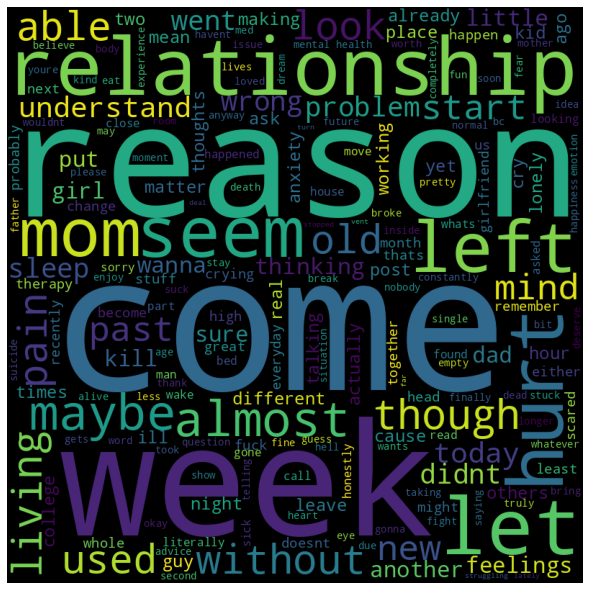

In [11]:
print("Word Cloud for Depression Text")
showwordcloud(newdepresseddf)

Word Cloud for Casual Conversation


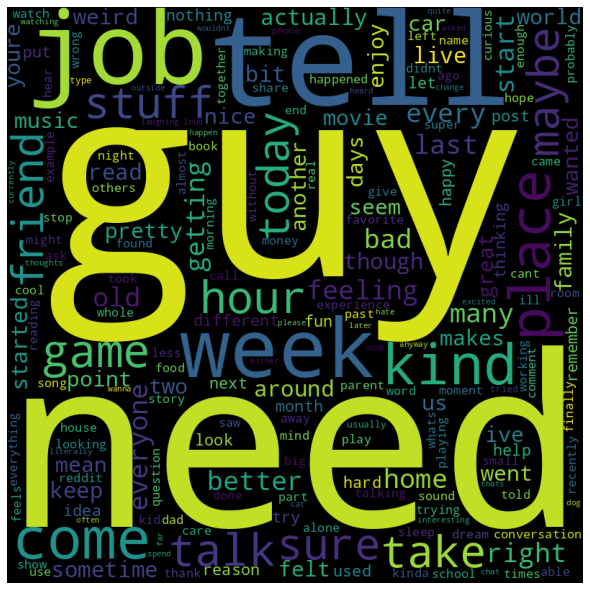

In [12]:
print("Word Cloud for Casual Conversation")
showwordcloud(newcasualconvdf)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



## TF-IDF (Term Frequency * Inverse Document Frequency)
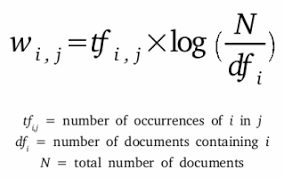

In [14]:
# Creating Vectorizer With max first 20,000 words from dictionary 
# ngram will be uni, bi & tri
# Tokenization will be char by char and not by word (better results)
tfidf1 = TfidfVectorizer(max_features = 20000, ngram_range=(1,3), analyzer='char')

# Tokenization will be Word by Word
tfidf2 = TfidfVectorizer(max_features = 20000, ngram_range=(1,3), analyzer='word')

In [15]:
X1 = tfidf1.fit_transform(mixeddf['text'])
y1 = mixeddf['isdepressed']  
X2 = tfidf2.fit_transform(mixeddf['text'])
y2 = mixeddf['isdepressed']  

In [16]:
# Number Of Unique Character features in Total Data
print("Feature Extraction using Characters")
print("Total Unique Characters Extracted" ,len(tfidf1.vocabulary_))
vocabdict = tfidf1.vocabulary_
{k: vocabdict[k] for k in list(vocabdict)[:50]}

Feature Extraction using Characters
Total Unique Characters Extracted 8558


{'d': 2493,
 'e': 2798,
 'p': 6087,
 'r': 6375,
 's': 6763,
 'i': 4021,
 'o': 5661,
 'n': 5279,
 ' ': 0,
 'l': 4658,
 'f': 3278,
 'g': 3507,
 't': 7137,
 'm': 5004,
 'u': 7484,
 'c': 2222,
 'k': 4470,
 'v': 7802,
 'a': 1583,
 'w': 7916,
 'j': 4394,
 'b': 2001,
 'y': 8242,
 'h': 3752,
 '3': 1012,
 '1': 720,
 'de': 2586,
 'ep': 3109,
 'pr': 6277,
 're': 6491,
 'es': 3154,
 'ss': 7052,
 'si': 6931,
 'io': 4253,
 'on': 5886,
 'n ': 5280,
 ' l': 353,
 'li': 4810,
 'if': 4143,
 'fe': 3348,
 's ': 6764,
 ' g': 275,
 'go': 3677,
 'ot': 5994,
 't ': 7138,
 ' m': 366,
 'me': 5103,
 'e ': 2799,
 ' f': 258,
 'fu': 3483}

In [17]:
# Number Of Unique Word features in Total Data
print("Feature Extraction using Words")
print("Total Unique Words Extracted",len(tfidf2.vocabulary_))

vocabdict = tfidf2.vocabulary_
{k: vocabdict[k] for k in list(vocabdict)[:50]}

Feature Extraction using Words
Total Unique Words Extracted 20000


{'depression': 4033,
 'lifes': 9496,
 'got': 6390,
 'me': 10162,
 'fucked': 6015,
 'up': 18071,
 'live': 9728,
 'in': 7769,
 'small': 14513,
 'rural': 13882,
 'town': 17846,
 'and': 863,
 'cant': 3181,
 'find': 5526,
 'job': 8795,
 'to': 17046,
 'save': 13959,
 'my': 10810,
 'life': 9425,
 'its': 8704,
 'really': 13548,
 'starting': 15000,
 'get': 6085,
 'been': 2397,
 'months': 10639,
 'of': 11967,
 'putting': 13437,
 'application': 1695,
 'after': 340,
 'never': 11367,
 'anything': 1634,
 'comes': 3487,
 'thru': 16908,
 'im': 7646,
 '31': 84,
 'have': 6763,
 'worked': 19499,
 'pretty': 13307,
 'much': 10754,
 'consistently': 3593,
 'since': 14418,
 'high': 7257,
 'school': 14023,
 'like': 9502,
 'somethings': 14859,
 'gotta': 6426,
 'give': 6218,
 'eventually': 4962,
 'right': 13811,
 'got me': 6406}

In [18]:
print("Extraction by Chars:(Rows,Features)",X1.shape)
print("Extraction by Words:(Rows,Features)",X2.shape)

Extraction by Chars:(Rows,Features) (2000, 8558)
Extraction by Words:(Rows,Features) (2000, 20000)


In [19]:
# Split Train and Test data 80/20
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=0) # Char Tokenization
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=0) # Word Tokenization
print("Number of Depressed(1) and Non-Depressed(0) Test Cases")
print(y1_test.value_counts())
print(y2_test.value_counts())

Number of Depressed(1) and Non-Depressed(0) Test Cases
1    200
0    200
Name: isdepressed, dtype: int64
1    200
0    200
Name: isdepressed, dtype: int64


In [20]:
# List of all the classifiers to be used
classifiers = [ LinearSVC(),
                SVC(kernel='rbf',C=10),
                SVC(kernel='linear',C=10),
                MultinomialNB(),
                LogisticRegression(),
                RandomForestClassifier(),
                DecisionTreeClassifier()                              
            ]

## Model With TF-IDF and Word Tokenization And Linear SVC


## Model Score Comparision With TF-IDF and Character Tokenization
### Models Used:
### LinearSVC, SVC, Multinomial Naive Bayes, Logistic Regression, Random Forest Classifiers, Decision Tree Classifiers

In [69]:
for clf in classifiers:
    print(clf,"Average Score ",end="")
    scores=cross_validate(clf,X1, y1,cv=10)
    print('{:.2%}'.format(np.mean(scores["test_score"])))

LinearSVC() Average Score 88.70%
SVC(C=10) Average Score 88.40%
SVC(C=10, kernel='linear') Average Score 88.40%
MultinomialNB() Average Score 78.80%
LogisticRegression() Average Score 84.65%
RandomForestClassifier() Average Score 85.50%
DecisionTreeClassifier() Average Score 73.45%


## Model Score Comparision With TF-IDF and Word Tokenization
### Models Used:
### LinearSVC, SVC, Multinomial Naive Bayes, Logistic Regression, Random Forest Classifiers, Decision Tree Classifiers

In [70]:
for clf in classifiers:
    print(clf,"Average Score ",end="")
    scores=cross_validate(clf,X2, y2,cv=10)
    print('{:.2%}'.format(np.mean(scores["test_score"])))

LinearSVC() Average Score 89.85%
SVC(C=10) Average Score 89.60%
SVC(C=10, kernel='linear') Average Score 90.00%
MultinomialNB() Average Score 87.50%
LogisticRegression() Average Score 87.95%
RandomForestClassifier() Average Score 86.60%
DecisionTreeClassifier() Average Score 74.65%


### We got Maximum Accuracy of 90.00% with SVC and TD-IDF Word Tokenization

In [21]:
    print("Classification Report For SVC and TD-IDF Word Tokenization")
    model = SVC(C=10,kernel='linear')
    model.fit(X2_train,y2_train)
    y_pred = model.predict(X2_test)
    print(classification_report(y2_test,y_pred))

Classification Report For SVC and TD-IDF Word Tokenization
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       200
           1       0.90      0.88      0.89       200

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



## Let's Test The Model with some texts

In [22]:
def predict_list(predtext):
    for x in predtext:
        x = get_clean(x)
        vec = tfidf2.transform([x])
        print("The Person Is Depressed") if(model.predict(vec)) else print("The Person Is not Depressed")
        
        



In [23]:
text1 = ["im feeling hopeless, have no energy, cant work. it sucks",
        "its very good to have everything working, i bought a car, got good marks",
        "i have no one to talk, all lonely, need therapy, medicines not work",
        "I have a cute dog, started a buisness, went to vacation last week",
        "I am working with facebook, i have good salary, have two chilren, everythings alright",
        "I have too much debt, my wife left, everything is falling apart, cant handle"
        ]

predict_list(text1)

The Person Is Depressed
The Person Is not Depressed
The Person Is Depressed
The Person Is not Depressed
The Person Is not Depressed
The Person Is Depressed
